In [1]:
import matplotlib.pyplot as plt
import numpy as np

from train_model import load_data, MnistClassifier

In [2]:
X_train, y_train, X_test, y_test = load_data()

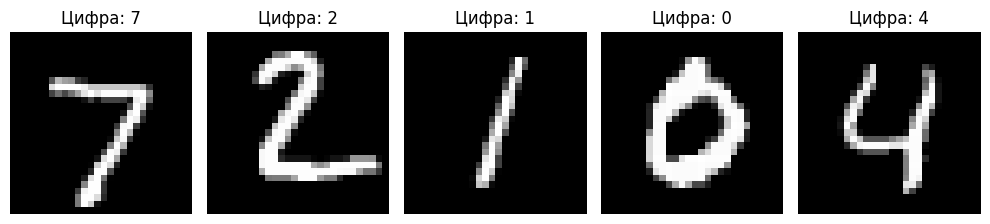

In [3]:
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Цифра: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
print("\nДемонстрація Random Forest:")
rf_model = MnistClassifier('rf')
print("Тренування моделі...")
rf_model.classifier.train_model(X_train, y_train)
print("Тестування моделі...")
rf_predictions = rf_model.classifier.predict_model(X_test) 
rf_accuracy = (rf_predictions == y_test).mean()
print(f"Точність Random Forest: {rf_accuracy:.4f}")


Демонстрація Random Forest:
Тренування моделі...
Тестування моделі...
Точність Random Forest: 0.9706


In [7]:
print("\nДемонстрація Neural Network:")
nn_model = MnistClassifier('nn')
print("Тренування моделі (може зайняти деякий час)...")
nn_model.classifier.train_model(X_train, y_train)  
print("Тестування моделі...")
nn_predictions = nn_model.classifier.predict_model(X_test)
nn_accuracy = (nn_predictions == y_test).mean()
print(f"Точність Neural Network: {nn_accuracy:.4f}")


Демонстрація Neural Network:
Тренування моделі (може зайняти деякий час)...
Epoch [1/5], Loss: 0.2865
Epoch [2/5], Loss: 0.1116
Epoch [3/5], Loss: 0.0719
Epoch [4/5], Loss: 0.0518
Epoch [5/5], Loss: 0.0390
Тестування моделі...
Точність Neural Network: 0.9774


In [11]:
print("\nДемонстрація CNN:")
cnn_model = MnistClassifier('cnn')
print("Тренування моделі (може зайняти деякий час)...")
cnn_model.classifier.train_model(X_train, y_train)  # Використовуємо лише 2 епохи для швидкості
print("Тестування моделі...")
cnn_predictions = cnn_model.classifier.predict_model(X_test)
cnn_accuracy = (cnn_predictions == y_test).mean()
print(f"Точність CNN: {cnn_accuracy:.4f}")


Демонстрація CNN:
Тренування моделі (може зайняти деякий час)...
Epoch [1/5], Loss: 1.6030
Epoch [2/5], Loss: 1.4891
Epoch [3/5], Loss: 1.4826
Epoch [4/5], Loss: 1.4782
Epoch [5/5], Loss: 1.4765
Тестування моделі...
Точність CNN: 0.9817



Порівняння точності моделей:


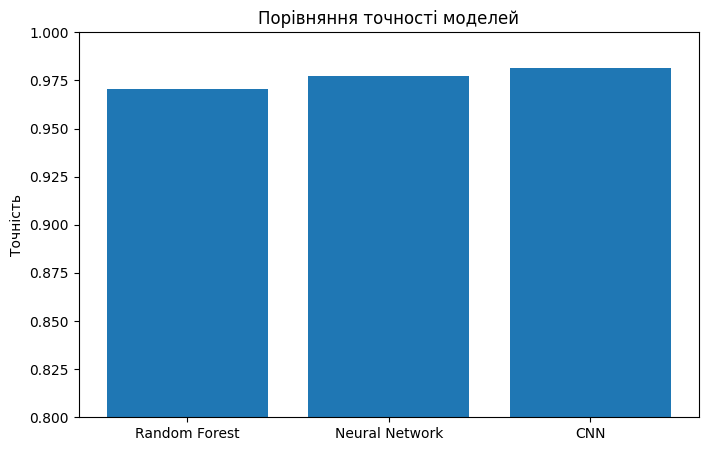

In [12]:
print("\nПорівняння точності моделей:")
models = ['Random Forest', 'Neural Network', 'CNN']
accuracies = [rf_accuracy, nn_accuracy, cnn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.ylim(0.8, 1.0)  # Зазвичай точність висока
plt.ylabel('Точність')
plt.title('Порівняння точності моделей')
plt.show()

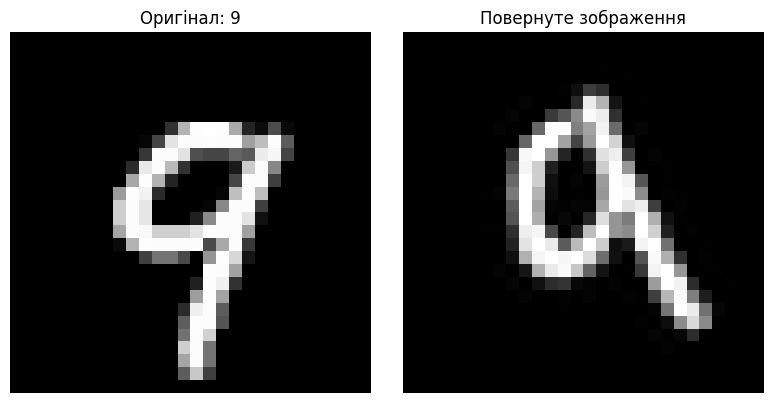


Передбачення для повернутого зображення:
Справжня цифра: 9
Random Forest передбачає: 9
Neural Network передбачає: 9
CNN передбачає: 9


In [15]:
from scipy.ndimage import rotate

example_idx = 12
example_image = X_test[example_idx]
example_label = y_test[example_idx]

rotated_image = rotate(example_image, 45, reshape=False)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(example_image, cmap='gray')
plt.title(f"Оригінал: {example_label}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title("Повернуте зображення")
plt.axis('off')
plt.tight_layout()
plt.show()

# Перевіряємо передбачення моделей на повернутому зображенні
rotated_image_reshaped = rotated_image.reshape(1, 28, 28)
print("\nПередбачення для повернутого зображення:")

rf_pred = rf_model.classifier.predict_model(rotated_image_reshaped)[0]
nn_pred = nn_model.classifier.predict_model(rotated_image_reshaped)[0]
cnn_pred = cnn_model.classifier.predict_model(rotated_image_reshaped)[0]

print(f"Справжня цифра: {example_label}")
print(f"Random Forest передбачає: {rf_pred}")
print(f"Neural Network передбачає: {nn_pred}")
print(f"CNN передбачає: {cnn_pred}")